Workflow:-
1. Data
2. Pre Processing
3. Data Analysis
4. Train Test Split
5. XG Boost Regressor
6. Evaluation

Importing Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Pre Processing

In [7]:
# Loading the CSV file

calories = pd.read_csv('/content/calories.csv')   # Both datasets infer the same person
exercise = pd.read_csv('/content/exercise.csv')

In [8]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
# We need to distinguish between calories burnt for various exercises performed.
# Different Exercises burn different amount of calories
# Heart rate & Body Temp. are the indirect measurement that tells the intensity of exercise.
# High Heart Rate for 10 mins (Running) >> burns more calories >> than moderate heart rate for 10 mins (Walking)

Combining the 2 dataframes

In [11]:
# Combining the calories column aside body temp.
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [12]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
calories_data.shape

(15000, 9)

In [14]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
# Checking for NULL values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [16]:
# Statistical Measures

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [17]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

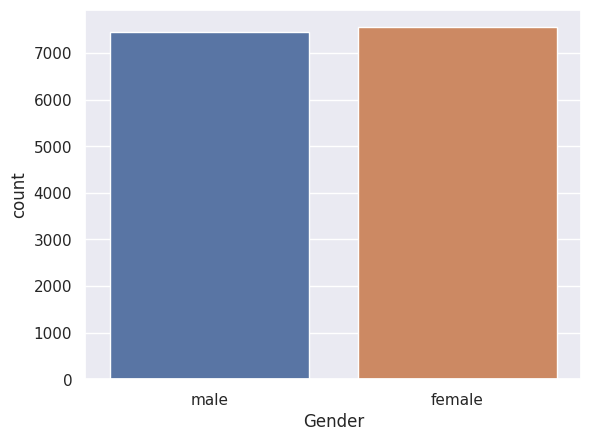

In [22]:
# Countplot for Gender Column

sns.countplot(x=calories_data['Gender'], hue=calories_data['Gender'])

<ipython-input-24-4cb19b63ccb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

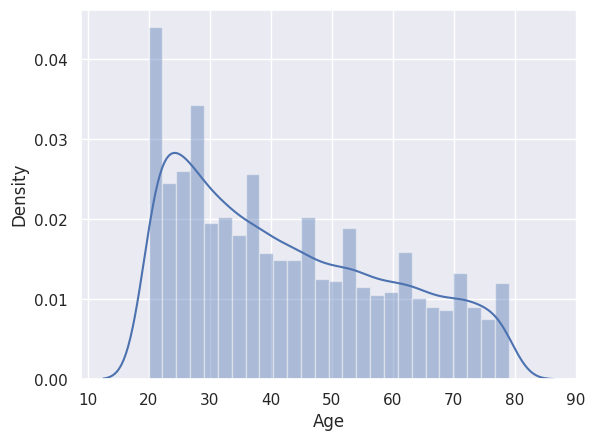

In [24]:
# Distribution plot for Age

sns.distplot(calories_data['Age'])

<ipython-input-25-cb6c12b83528>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

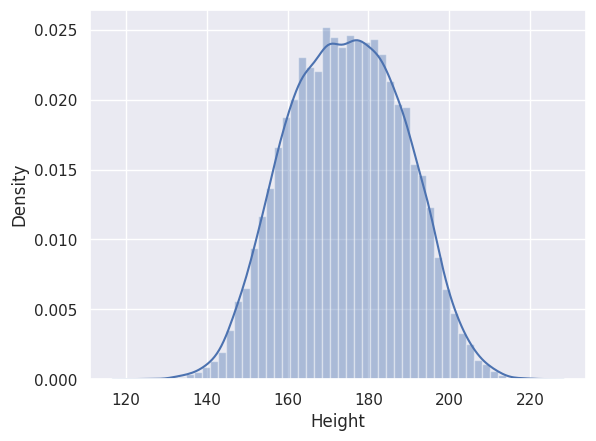

In [25]:
# Distribution plot for Height

sns.distplot(calories_data['Height'])

<ipython-input-26-dff8172da0ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

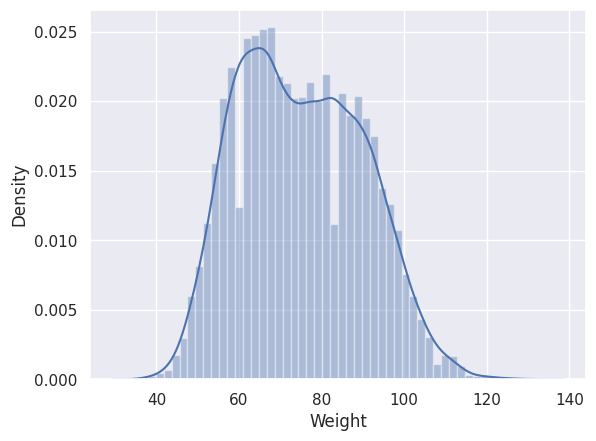

In [26]:
# Distribution plot for Weight

sns.distplot(calories_data['Weight'])

<ipython-input-28-0f1c81244e85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

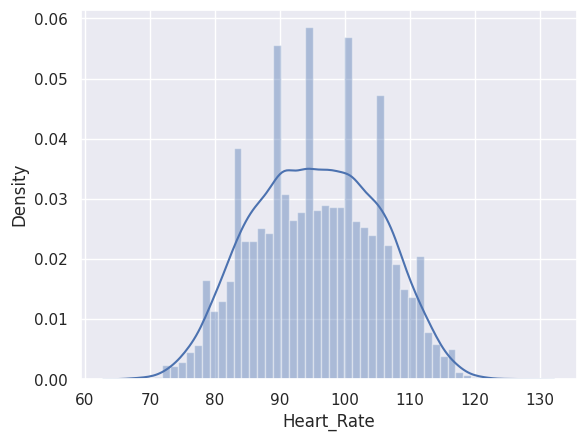

In [28]:
# Distribution plot for Heart Rate

sns.distplot(calories_data['Heart_Rate'])

In [30]:
# Encoding the male -> 1 & female -> 0

calories_data.replace({"Gender":{'male':1, 'female':0}}, inplace=True)

# Checking the Correlation
correlation = calories_data.corr()

Heatmap

<Axes: >

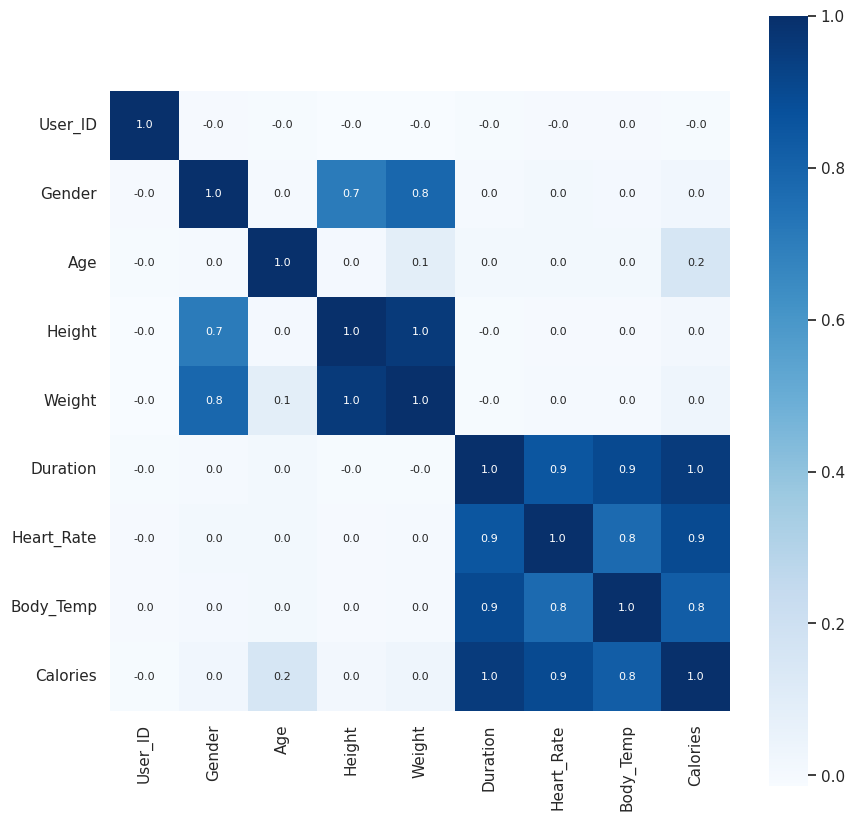

In [31]:
# Constructing heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
# No Corr for categorical columns

In [32]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating Features and Target

In [33]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [34]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [36]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
# Shape of splits

print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Passing the data to model

In [39]:
XGBoost = XGBRegressor()

In [40]:
# Passing the training & test data to model

XGBoost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# Making prediction on training data and accuracy

training_data_prediction = XGBoost.predict(X_train)

# Checking accuracy on training data
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', score_1)

R squared value :  0.9995691477017405


In [43]:
# Passing the test data

test_data_prediction = XGBoost.predict(X_test)

# Checking accuracy on test data
score_2 = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', score_2)

R squared value :  0.998800624504713


Mean Absolute error

In [44]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [45]:
mean_absolute_error = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error : ', mean_absolute_error)

Mean Absolute Error :  1.4833678883314132
